# t-sne 觀察 : 流形還原

# [作業目標]
- 試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果


    PS. 流形還原就是在⾼高維度到低維度的對應中，盡量保持資料點之間的遠近關係，沒有資料點的地方，就不列列入考量量範圍

# [作業重點]
- 使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 (In[4], Out[4])
- Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [0]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

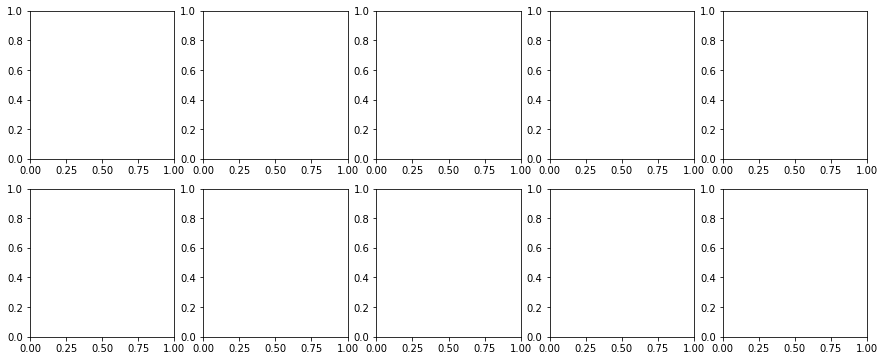

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

In [3]:
color[:10]

array([ 0.46005644,  2.028112  ,  0.968522  ,  0.42301403, -0.71953656,
        1.37501962, -0.58822668,  3.69237354,  4.36991857, -1.0985378 ])

In [4]:
X[:5]

array([[ 0.44399868,  1.813111  , -0.10397256],
       [ 0.89724097,  1.54809467, -1.44154121],
       [ 0.8240493 ,  0.6662903 , -0.43348191],
       [ 0.41051068,  0.16220278, -0.08814421],
       [-0.65903619,  0.81448234,  0.24788877]])

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

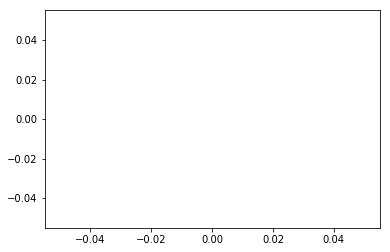

In [5]:
# 繪製資料原圖
ax = subplots[0][0]
#fig, ax = plt.subplots() #改成這樣, 圖就可以顯示
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [6]:
# 繪製不同 perplexity 下的 t-SNE 流形還原圖 (請注意! 語法也要對應調整)

for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]
   
    t0 = time() #顯示執行開始時間
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time() #顯示結束開始時間
    print("S-shape, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X[:, 0], X[:, 2], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()


#圖不顯示??

S-shape, perplexity=4 in 1.1 sec
S-shape, perplexity=6 in 1.2 sec
S-shape, perplexity=9 in 1.3 sec
S-shape, perplexity=14 in 1.3 sec
S-shape, perplexity=21 in 1.4 sec
S-shape, perplexity=30 in 1.5 sec
S-shape, perplexity=45 in 1.7 sec
S-shape, perplexity=66 in 1.6 sec
S-shape, perplexity=100 in 2.4 sec


In [7]:
for i, perplexity in enumerate(perplexities):
  print(i, perplexity)

0 4
1 6
2 9
3 14
4 21
5 30
6 45
7 66
8 100


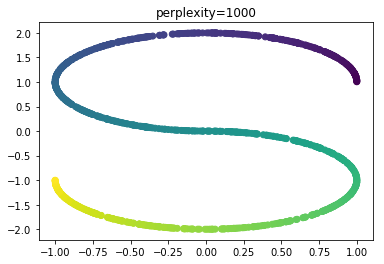

In [19]:
tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=1000)
Y = tsne.fit_transform(X) #重新跑

fig, ax = plt.subplots() #改成這樣, 圖就可以顯示
ax.set_title("perplexity=1000")
ax.scatter(X[:, 0], X[:, 2], c=color)
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
#plt.axis('tight')

流形學習: 有例子ref
http://wiki.swarma.net/index.php?title=%E6%B5%81%E5%BD%A2%E5%AD%A6%E4%B9%A0&variant=zh-tw

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


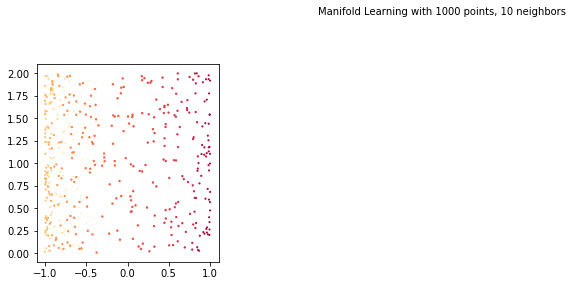

In [21]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
                % (1000, n_neighbors), fontsize=10)
ax = fig.add_subplot(241)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.draw()